# Sales Forecasting

Predict future sales using time series analysis.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt


In [2]:

# Load sample sales dataset
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv")
df.columns = ['Date', 'Sales']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()


,Sales
Date,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


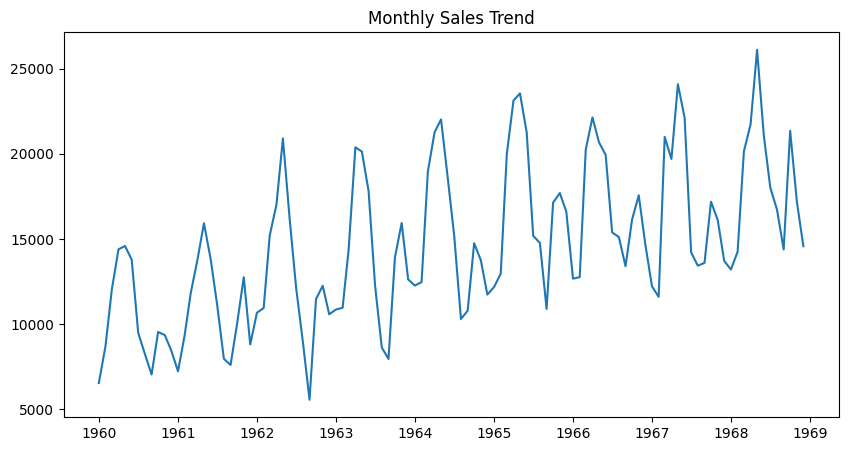

In [3]:

# Visualize sales trend
plt.figure(figsize=(10,5))
plt.plot(df['Sales'])
plt.title("Monthly Sales Trend")
plt.show()


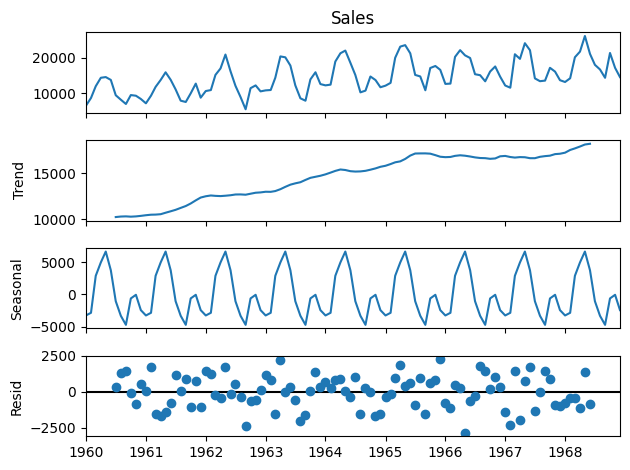

In [4]:

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Sales'], model='additive')
decomposition.plot()
plt.show()


In [5]:

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [6]:

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast


,predicted_mean
1969-01-01,15313.428454
1969-02-01,15810.892479
1969-03-01,16146.933891
1969-04-01,16373.932878
1969-05-01,16527.272730
1969-06-01,16630.855175
1969-07-01,16700.826046
1969-08-01,16748.091997
1969-09-01,16780.020570
1969-10-01,16801.588608


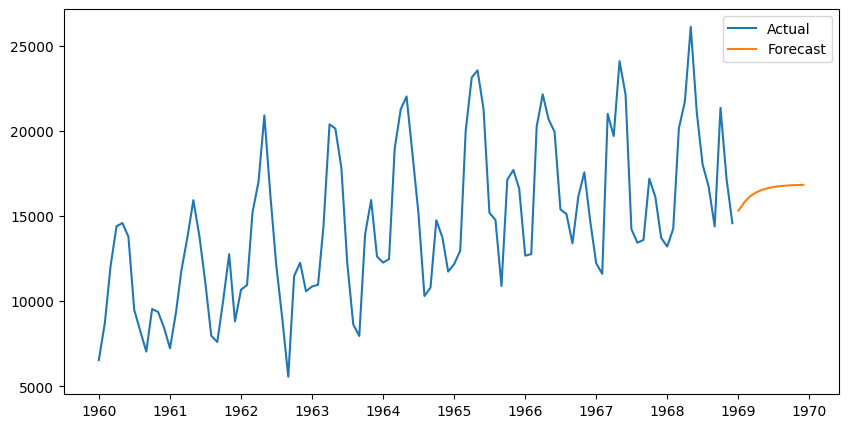

In [7]:

plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


### Conclusion
Sales forecasting helps in inventory and business planning.